# 6.1 Sourcing Open Data

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import os

In [4]:
#Import Real Estate Dataframe
df_realtor_data = pd.read_csv('/Users/ariedlin/Desktop/realtor-data.zip.csv')

In [6]:
#Check the shape of the dataframe to ensure it imported correctly
df_realtor_data.shape

(2226382, 12)

In [8]:
#Check the head to make sure everything looks good
df_realtor_data.head(10)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0,NaN
6,1205.0,for_sale,50000.0,3.0,1.0,0.20,1298094.0,Ciales,Puerto Rico,639.0,2040.0,NaN
7,50739.0,for_sale,71600.0,3.0,2.0,0.08,1048466.0,Ponce,Puerto Rico,731.0,1050.0,NaN
8,81909.0,for_sale,100000.0,2.0,1.0,0.09,734904.0,Ponce,Puerto Rico,730.0,1092.0,NaN
9,65672.0,for_sale,300000.0,5.0,3.0,7.46,1946226.0,Las Marias,Puerto Rico,670.0,5403.0,NaN


# Removing Unnecessary Columns

In [10]:
#Drop 'brokered_by' column.  It is encrypted and not useful for analysis.
df_realtor_data = df_realtor_data.drop(columns=['brokered_by'])

In [12]:
#Drop 'street' column.  It is encrypted and not useful for analysis.
df_realtor_data = df_realtor_data.drop(columns=['street'])

In [14]:
#Ensure columns were dropped
df_realtor_data.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
0,for_sale,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN


# Filtering out responses from outside the 50 US States

In [16]:
#In this project, I will be focusing on real estate in the 50 US states, so I am filtering out all responses from Puerto Rico
df_realtor_data = df_realtor_data[df_realtor_data['state'] != 'Puerto Rico']

In [49]:
#Check the 'state' column for unique responses to see if there are any other entities that need to be removed
state_list = df_realtor_data['state'].unique()
print(state_list)

['Massachusetts' 'Connecticut' 'New Hampshire' 'Vermont' 'New Jersey'
 'New York' 'South Carolina' 'Tennessee' 'Rhode Island' 'Virginia'
 'Wyoming' 'Maine' 'Georgia' 'Pennsylvania' 'West Virginia' 'Delaware'
 'Louisiana' 'Ohio' 'California' 'Colorado' 'Maryland' 'Missouri'
 'Wisconsin' 'North Carolina' 'Kentucky' 'Michigan' 'Mississippi'
 'Florida' 'Alabama' 'Texas' 'Arkansas' 'Idaho' 'Indiana' 'Illinois'
 'New Mexico' 'Iowa' 'Minnesota' 'South Dakota' 'Nebraska' 'North Dakota'
 'Montana' 'Oklahoma' 'Kansas' 'Oregon' 'Utah' 'Nevada' 'Washington'
 'Arizona' 'Hawaii' 'Alaska']


In [20]:
# Define the list of states to exclude
exclude_states = ['Virgin Islands', 'Guam', 'District of Columbia', 'New Brunswick']

# Filter the DataFrame to exclude those states
df_realtor_data = df_realtor_data[~df_realtor_data['state'].isin(exclude_states)]

In [22]:
#Check the 'state' column again to make sure exclude_states have been filtered out
state_list = df_realtor_data['state'].unique()
print(state_list)

['Massachusetts' 'Connecticut' 'New Hampshire' 'Vermont' 'New Jersey'
 'New York' 'South Carolina' 'Tennessee' 'Rhode Island' 'Virginia'
 'Wyoming' 'Maine' 'Georgia' 'Pennsylvania' 'West Virginia' 'Delaware'
 'Louisiana' 'Ohio' 'California' 'Colorado' 'Maryland' 'Missouri'
 'Wisconsin' 'North Carolina' 'Kentucky' 'Michigan' 'Mississippi'
 'Florida' 'Alabama' nan 'Texas' 'Arkansas' 'Idaho' 'Indiana' 'Illinois'
 'New Mexico' 'Iowa' 'Minnesota' 'South Dakota' 'Nebraska' 'North Dakota'
 'Montana' 'Oklahoma' 'Kansas' 'Oregon' 'Utah' 'Nevada' 'Washington'
 'Arizona' 'Hawaii' 'Alaska']


# Checking for missing values

In [24]:
#Check to see how many 'nan' responses there are for 'state'
nan_count = df_realtor_data['state'].isna().sum()
print(f"Number of NaN responses in the 'state' column: {nan_count}")

Number of NaN responses in the 'state' column: 8


In [26]:
#Remove 'nan' responses from the dataframe because there are only 8 and it will not affect the data analysis.
df_realtor_data = df_realtor_data.dropna(subset=['state'])

In [30]:
#Check the 'price' column to see if there are missing values
missing_price_count = df_realtor_data['price'].isna().sum()
print(f"Number of missing values in the 'price' column: {missing_price_count}")

Number of missing values in the 'price' column: 1541


In [32]:
#Remove responses missing 'price' from the dataframe.  Price is a critical variable, and responses missing values are not helpful for analysis
df_realtor_data = df_realtor_data.dropna(subset=['price'])

In [41]:
#Check the 'bed' column to see if there are missing values
missing_bed_count = df_realtor_data['bed'].isna().sum()
print(f"Number of missing values in the 'bed' column: {missing_bed_count}")

Number of missing values in the 'bed' column: 479109


In [39]:
#Check the 'bath' column to see if there are missing values
missing_bath_count = df_realtor_data['bath'].isna().sum()
print(f"Number of missing values in the 'bath' column: {missing_bath_count}")

Number of missing values in the 'bath' column: 509365


I am choosing not to remove these missing values because unseful information can still be gained from those responses from their location and price.  Also, there are too many missing values.

In [43]:
#Check the 'acre_lot' column to see if there are missing values
missing_acre_lot_count = df_realtor_data['acre_lot'].isna().sum()
print(f"Number of missing values in the 'acre_lot' column: {missing_acre_lot_count}")

Number of missing values in the 'acre_lot' column: 320527


In [45]:
#Check the 'house_size' column to see if there are missing values
missing_house_size_count = df_realtor_data['house_size'].isna().sum()
print(f"Number of missing values in the 'house_size' column: {missing_house_size_count}")

Number of missing values in the 'house_size' column: 566148


In [56]:
# Check the 'prev_sold_date' column to see if there are missing values
missing_prev_sold_date_count = df_realtor_data['prev_sold_date'].isna().sum()
print(f"Number of missing values in the 'prev_sold_date' column: {missing_prev_sold_date_count}")

Number of missing values in the 'prev_sold_date' column: 728234


Again, I am choosing not to remove responses missing values because I think there is still useful data in these responses.  Also, there are too many missing values.

# Exploratory Data Checks

In [60]:
#Check the summary of the data frame
print(df_realtor_data.describe())

              price           bed          bath      acre_lot      zip_code  \
count  2.213697e+06  1.734588e+06  1.704332e+06  1.893170e+06  2.213427e+06   
mean   5.228222e+05  3.277465e+00  2.496883e+00  1.513375e+01  5.236787e+04   
std    2.142057e+06  1.566805e+00  1.653473e+00  7.573445e+02  2.888786e+04   
min    0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.650000e+05  3.000000e+00  2.000000e+00  1.500000e-01  2.969000e+04   
50%    3.250000e+05  3.000000e+00  2.000000e+00  2.600000e-01  4.865300e+04   
75%    5.500000e+05  4.000000e+00  3.000000e+00  9.900000e-01  7.813000e+04   
max    2.147484e+09  4.730000e+02  8.300000e+02  1.000000e+05  9.999900e+04   

         house_size  
count  1.647549e+06  
mean   2.719358e+03  
std    8.106970e+05  
min    4.000000e+00  
25%    1.300000e+03  
50%    1.761000e+03  
75%    2.414000e+03  
max    1.040400e+09  


In [62]:
#Check data types
print(df_realtor_data.dtypes)

status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object


In [64]:
#Import Seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

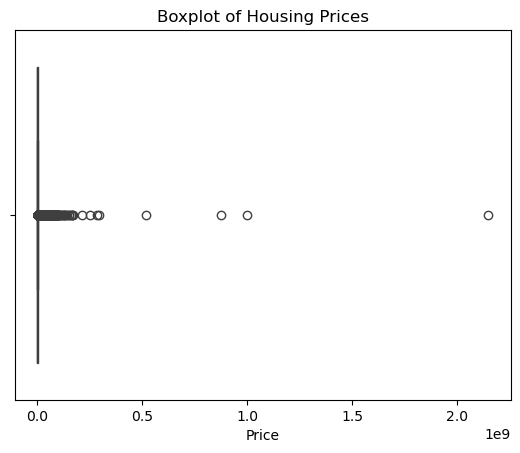

In [68]:
# Check for outliers in the 'price' column
sns.boxplot(x=df_realtor_data['price'])

# Add axis labels and a title
plt.xlabel('Price')
plt.title('Boxplot of Housing Prices')

# Show the plot
plt.show()

# Removing Outliers

There are some outliers within the 'price' column that need to be removed.  For instance, the max shows that a house was listed for over 2 billion dollars, and the min shows a listing for 0 dollars which are both unrealistic.  If he outliers are not removed, they will potentially skew our results.

In [76]:
#Removing Outliers
#Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_realtor_data['price'].quantile(0.25)
Q3 = df_realtor_data['price'].quantile(0.75)

#Calculate IQR
IQR = Q3 - Q1

#Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter the DataFrame to remove outliers in the 'price' column
df_realtor_data_no_outliers = df_realtor_data[(df_realtor_data['price'] >= lower_bound) & (df_realtor_data['price'] <= upper_bound)]

#Show the new DataFrame without outliers
print(f"Original DataFrame shape: {df_realtor_data.shape}")
print(f"DataFrame shape after removing outliers: {df_realtor_data_no_outliers.shape}")

Original DataFrame shape: (2213697, 10)
DataFrame shape after removing outliers: (2043907, 10)


In [80]:
#Check the updated summary of the data frame
print(df_realtor_data_no_outliers.describe())

              price           bed          bath      acre_lot      zip_code  \
count  2.043907e+06  1.590102e+06  1.561137e+06  1.749424e+06  2.043680e+06   
mean   3.423756e+05  3.186926e+00  2.350249e+00  1.248848e+01  5.177659e+04   
std    2.442689e+05  1.308319e+00  1.428332e+00  7.452733e+02  2.831838e+04   
min    0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  6.040000e+02   
25%    1.500000e+05  3.000000e+00  2.000000e+00  1.500000e-01  2.969000e+04   
50%    2.999000e+05  3.000000e+00  2.000000e+00  2.600000e-01  4.809800e+04   
75%    4.791565e+05  4.000000e+00  3.000000e+00  9.100000e-01  7.743300e+04   
max    1.127500e+06  4.730000e+02  8.300000e+02  1.000000e+05  9.999900e+04   

         house_size  
count  1.509894e+06  
mean   2.616677e+03  
std    8.467697e+05  
min    1.000000e+02  
25%    1.274000e+03  
50%    1.700000e+03  
75%    2.291000e+03  
max    1.040400e+09  


Removing the outliers removed the high priced outlier, but the min stayed at 0.

# Create new variable 'price_range' based off 'price'

In [84]:
#Define the price range bins and labels
bins = [0, 299999, 699999, float('inf')]  # Define the bins for low, medium, and high ranges
labels = ['Low Range', 'Med Range', 'High Range']  # Labels for the bins

#Create a new column 'price_range' based on the 'price' column
df_realtor_data_no_outliers['price_range'] = pd.cut(df_realtor_data_no_outliers['price'], bins=bins, labels=labels, right=True)

#Show the updated DataFrame with 'price' and 'price_range'
print(df_realtor_data_no_outliers[['price', 'price_range']].head())

         price price_range
3403  180000.0   Low Range
3404   25000.0   Low Range
3405  169900.0   Low Range
3406  242000.0   Low Range
3407  299950.0   Low Range


/var/folders/zg/lgqcn1jn6md3p8399q9rqkwm0000gn/T/ipykernel_44585/895156456.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_realtor_data_no_outliers['price_range'] = pd.cut(df_realtor_data_no_outliers['price'], bins=bins, labels=labels, right=True)


In [86]:
#Find value counts for the 'price_range' column to see the distribution
price_range_counts = df_realtor_data_no_outliers['price_range'].value_counts()

#Display the counts
print(price_range_counts)

price_range
Low Range     1035309
Med Range      811795
High Range     196523
Name: count, dtype: int64


In [90]:
#Check the head to make sure everything looks good
df_realtor_data_no_outliers.head(100)

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price_range
3403,for_sale,180000.0,2.0,1.0,0.34,Agawam,Massachusetts,1001.0,676.0,NaN,Low Range
3404,for_sale,25000.0,NaN,NaN,3.41,Agawam,Massachusetts,1001.0,NaN,NaN,Low Range
3405,for_sale,169900.0,2.0,2.0,NaN,Agawam,Massachusetts,1001.0,892.0,2019-04-30,Low Range
3406,for_sale,242000.0,2.0,2.0,NaN,Agawam,Massachusetts,1001.0,1428.0,NaN,Low Range
3407,for_sale,299950.0,2.0,2.0,NaN,Agawam,Massachusetts,1001.0,1659.0,NaN,Low Range
...,...,...,...,...,...,...,...,...,...,...,...
3500,for_sale,80000.0,NaN,NaN,8.15,Barre,Massachusetts,1005.0,NaN,NaN,Low Range
3501,for_sale,189900.0,2.0,2.0,0.23,Barre,Massachusetts,1005.0,1200.0,NaN,Low Range
3502,for_sale,89000.0,NaN,NaN,5.09,Barre,Massachusetts,1005.0,NaN,NaN,Low Range
3503,for_sale,273900.0,3.0,1.0,0.12,Barre,Massachusetts,1005.0,1175.0,1996-12-13,Low Range


In [94]:
#Rename the dataframe
df_realtor_data_cleaned = df_realtor_data_no_outliers

In [96]:
#Export the cleaned dataframe
df_realtor_data_cleaned.to_pickle('/Users/ariedlin/Desktop/Career Foundry Assignments/6.1-6.7/df_realtor_data_cleaned')